In [1]:
# Importar bibliotecas
from bcb import sgs
from statsmodels.tsa import x13
import os
# Coleta de dados
dados = sgs.get(
  codes = {"e": 1403},
  start = "2003-01-01"
  )

In [3]:
dados

,e
Date,
2003-01-01,6786
2003-02-01,6518
2003-03-01,6618
2003-04-01,6228
2003-05-01,6354
...,...
2024-06-01,13920
2024-07-01,13374
2024-08-01,13745


In [4]:
# Baixa e descompacta o X13-ARIMA-SEATS (veja mais info em: https://www.census.gov/data/software/x13as.X-13ARIMA-SEATS.html)
!wget https://www2.census.gov/software/x-13arima-seats/x13as/unix-linux/program-archives/x13as_ascii-v1-1-b59.tar.gz
!tar --gunzip --extract --verbose --file=x13as_ascii-v1-1-b59.tar.gz
# Define o caminho do programa como variável de ambiente
os.environ["X13PATH"] = "x13as"

--2024-12-14 14:41:45--  https://www2.census.gov/software/x-13arima-seats/x13as/unix-linux/program-archives/x13as_ascii-v1-1-b59.tar.gz
Resolvendo www2.census.gov (www2.census.gov)... 23.61.49.131, 2600:1403:5400:393::208c, 2600:1403:5400:387::208c
Conectando-se a www2.census.gov (www2.census.gov)|23.61.49.131|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 200 OK
Tamanho: 3780035 (3,6M) [application/x-tar]
Salvando em: ‘x13as_ascii-v1-1-b59.tar.gz’

x13as_ascii-v1-1-b5 100%[===================>]   3,60M  3,88MB/s    em 0,9s    

2024-12-14 14:41:47 (3,88 MB/s) - ‘x13as_ascii-v1-1-b59.tar.gz’ salvo [3780035/3780035]

x13as/
x13as/docs/
x13as/docs/docx13as.pdf
x13as/docs/qrefX13ASunix.pdf
x13as/testairline.spc
x13as/x13as_ascii


In [5]:
# Modelo de ajuste sazonal
modelo_x13 = x13.x13_arima_analysis(endog = dados.e)

/home/eco/Analise_Macro/venv/lib/python3.12/site-packages/statsmodels/tsa/x13.py:192: X13Warning: WARNING: At least one visually significant trading day peak has been
          found in the estimated spectrum of the regARIMA residuals.
  
          found in one or more of the estimated spectra.
  warn(errors, X13Warning)


In [6]:
# Componentes da série (série ajustada = seasadj)
modelo_x13.seasadj

Date
2003-01-01     6427.211245
2003-02-01     6483.082999
2003-03-01     6470.283437
2003-04-01     6005.347326
2003-05-01     6434.617454
                  ...     
2024-06-01    14768.743422
2024-07-01    14540.095281
2024-08-01    14687.152008
2024-09-01    14677.416726
2024-10-01    14983.801348
Name: seasadj, Length: 262, dtype: float64

<Axes: xlabel='Date'>

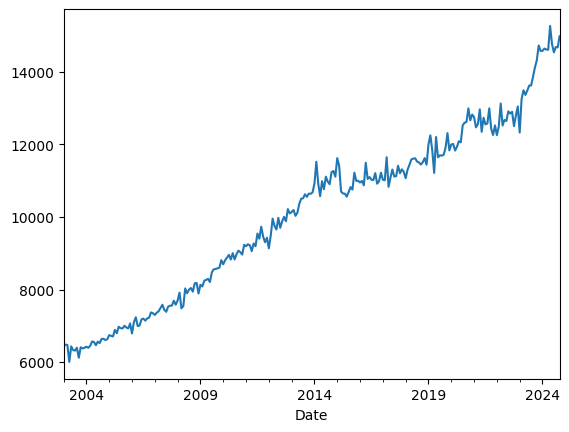

In [9]:
modelo_x13.seasadj.plot()

In [10]:
import pandas as pd 
import ipeadatapy as ip

In [38]:
previdencia=ip.timeseries('MPAS12_RESPRGPS12')
previdencia['valor']=previdencia['VALUE (R$)'].dropna()
previdencia

,CODE,RAW DATE,DAY,MONTH,YEAR,VALUE (R$),valor
DATE,,,,,,,
2003-02-01,MPAS12_RESPRGPS12,2003-02-01T00:00:00-02:00,1,2,2003,-1.083670e+06,-1.083670e+06
2003-03-01,MPAS12_RESPRGPS12,2003-03-01T00:00:00-03:00,1,3,2003,-1.536775e+06,-1.536775e+06
2003-04-01,MPAS12_RESPRGPS12,2003-04-01T00:00:00-03:00,1,4,2003,-1.554597e+06,-1.554597e+06
2003-05-01,MPAS12_RESPRGPS12,2003-05-01T00:00:00-03:00,1,5,2003,-1.810113e+06,-1.810113e+06
2003-06-01,MPAS12_RESPRGPS12,2003-06-01T00:00:00-03:00,1,6,2003,-1.891525e+06,-1.891525e+06
...,...,...,...,...,...,...,...
2024-05-01,MPAS12_RESPRGPS12,2024-05-01T00:00:00-03:00,1,5,2024,-6.102708e+07,-6.102708e+07
2024-06-01,MPAS12_RESPRGPS12,2024-06-01T00:00:00-03:00,1,6,2024,-4.489903e+07,-4.489903e+07
2024-07-01,MPAS12_RESPRGPS12,2024-07-01T00:00:00-03:00,1,7,2024,-2.245627e+07,-2.245627e+07


In [39]:
modelo_x12 = x13.x13_arima_analysis(endog = previdencia['VALUE (R$)'])

/home/eco/Analise_Macro/venv/lib/python3.12/site-packages/statsmodels/tsa/x13.py:192: X13Warning: WARNING: Automatic transformation selection cannot be done on a
          series with zero or negative values.
  warn(errors, X13Warning)


In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [33]:
model=modelo_x12.seasadj.dropna()

In [1]:
model.plot()

NameError: name 'model' is not defined

In [35]:
resultado_previdencia=seasonal_decompose(previdencia['valor'].dropna(),model='additive')

In [37]:
resultado_previdencia

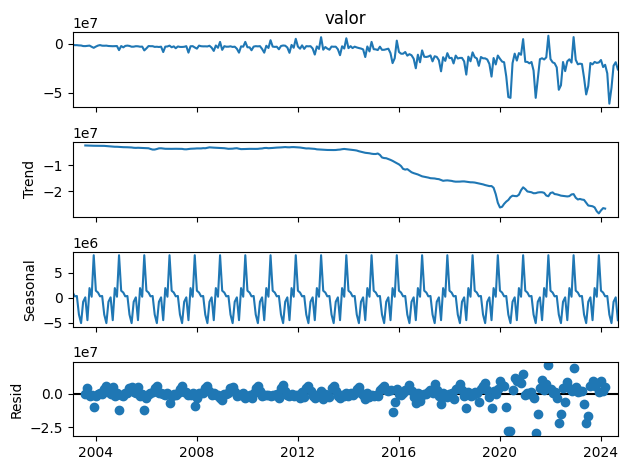

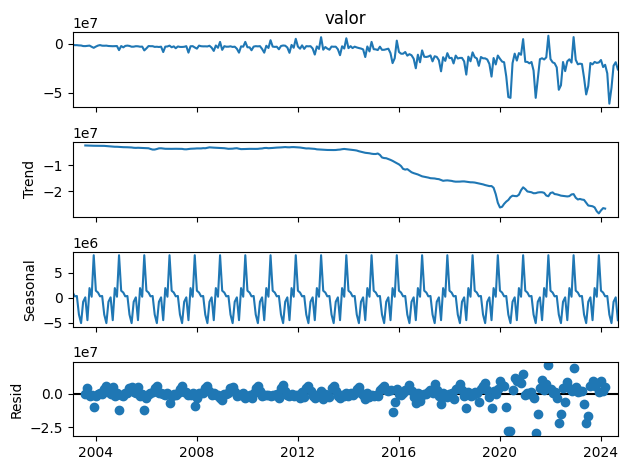

In [36]:
resultado_previdencia.plot()


In [30]:
import requests
import pandas as pd
resposta = requests.get("https://api.bcb.gov.br/dados/serie/bcdata.sgs.1/dados?formato=json")
tabela = pd.DataFrame(resposta.json()).dropna()

In [31]:
tabela

,data,valor
0,28/11/1984,2828.0000
1,29/11/1984,2828.0000
2,30/11/1984,2881.0000
3,03/12/1984,2881.0000
4,04/12/1984,2881.0000
...,...,...
10030,09/12/2024,6.0570
10031,10/12/2024,6.0529
10032,11/12/2024,6.0320
10033,12/12/2024,5.9408


In [2]:

tabela.assign(
periodo = lambda x: pd.to_datetime(x.data, format = "%d/%m/%Y").dt.to_period(freq = "M")
).groupby(by = "periodo", as_index = False).agg(dolar = ("dolar", np.mean)).assign(periodo = lambda x: x.periodo.dt.to_timestamp(freq = "M")).query("periodo >= '2023-01-01'")\


SyntaxError: incomplete input (3956109042.py, line 3)